# 1. Task Goal and Description
The goal of this task is to practice Natural Language Processing (NLP) techniques with different python libraries. Also, to build a machine learning model that can determine if a tweet is negative, positive, or neutral. 

The dataset was provided by [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment). The dataset includes customers tweets for six US airlines. Each tweet was categorized as negative, positive, or neutral.

The steps to solve this task will be divided into five main steps:
1. Exploratory Data Analysis (EDA)
2. Data Cleaning
3. Modeling 
4. Testing

Each step will have multiple substeps 

# Import Requirements

In [1]:
import pandas as pd
import numpy as np
import re

# 2. Data

## 2.1 Load the Dataset

In [2]:
airlines_dataset = pd.read_csv("data/Tweets.csv")

## 2.2 Exploratory Data Analysis
* The dataset contains 14640 rows and 15 columns.

In [4]:
print("(# of rows, # of columns)")
airlines_dataset.shape

(# of rows, # of columns)


(14640, 15)

<b>The dataset features (columns) that will be used in this notebook are:</b>
1. text => the tweet
2. airline_sentiment => (negative, positive, neutral)
3. negativereason => The reason why this tweet is negative (Will be removed)
4. airline => airline name (Will be removed)

<b>The dataset features that are not helpful are:</b>
1. tweet_id
2. airline_sentiment_gold
3. name => username
4. negativereason_gold
5. retweet_count
6. tweet_coord 
7. tweet_created
8. tweet_location 
9. user_timezone
10. negativereason_confidence
11. airline_sentiment_confidence

In [5]:
#print the first 10 rows
airlines_dataset.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [6]:
#Drop (delete) the 11 unwanted features
columns = {"tweet_id", "airline_sentiment_gold", "name", 
           "negativereason_gold", "retweet_count", "tweet_coord", 
           "tweet_created", "tweet_location", "user_timezone",
           "negativereason_confidence", "airline_sentiment_confidence"}

airlines_dataset.drop(columns=columns, inplace=True)

In [7]:
#show the first 10 rows
airlines_dataset.head(10)

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,positive,NaN,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,NaN,Virgin America,@VirginAmerica Really missed a prime opportuni...
8,positive,NaN,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,NaN,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."


### Number of Tweets for ach Airline
<b>As the bar chart shows the number of tweets is different between the airlines</b>
1. United (Most tweets)
2. US Airways
3. American
4. Southwest
5. Delta
6. Virgin America (Least tweets)

### <i>NOTE:</i> The difference in the number of tweets might affect some thoughts in Exploratory Data Analysis (EDA). So it is unfair to conclude something from this dataset. But EDA will be done to understand the dataset more. <i>HOWEVER,</i> this difference will not affect the machine learning model. 

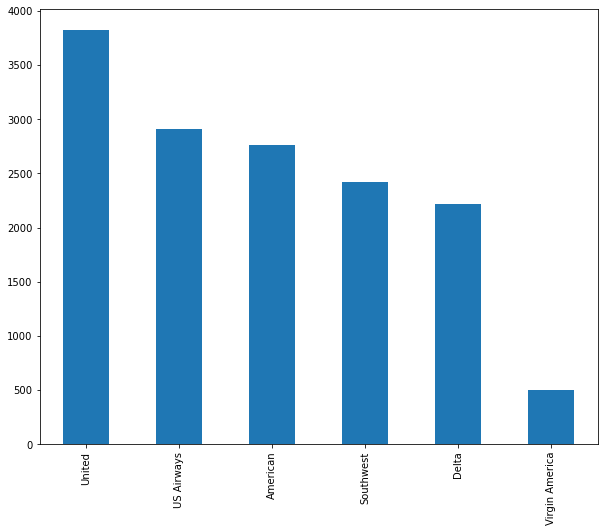

In [8]:
airlines_dataset.airline.value_counts().plot(kind="bar", figsize=(10,8))

### Number of Negative Tweets
As the bar chart shows <b>most of the tweets are negative</b>. 

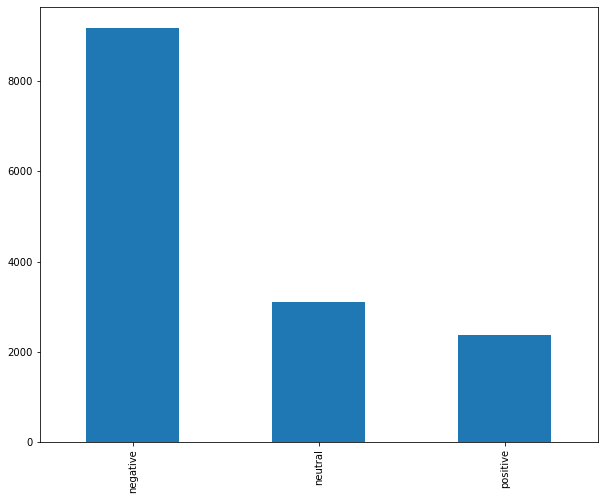

In [9]:
airlines_dataset.airline_sentiment.value_counts().plot(kind="bar", figsize=(10,8))

### Number of Negative, Positive, and Neutral Tweets for each Airline
As the grouped bar chart suggests:

* <b>United airline</b> has the most negative tweets; and <b>Virgin America</b> has the <b>least</b> negative tweets.
* <b>Southwest</b> has the most positive tweets; and <b>Virgin America</b> has the <b>least</b> positive tweets.

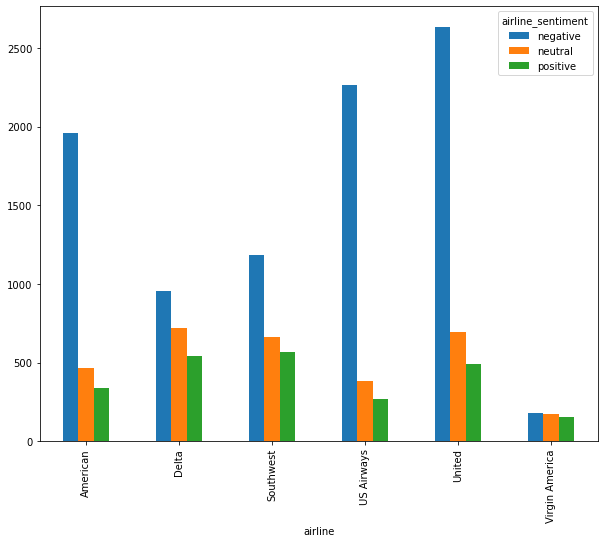

In [10]:
airlines_sentiments = airlines_dataset.groupby("airline")["airline_sentiment"].value_counts()

airlines_sentiments.unstack(1).plot(kind="bar", figsize=(10,8))

### Negative Reasons
These are the negative reasons for negative tweets. Let us check the most negative reason. This step might helps airlines to improve some services.

In [11]:
set(airlines_dataset.negativereason)

{'Bad Flight',
 "Can't Tell",
 'Cancelled Flight',
 'Customer Service Issue',
 'Damaged Luggage',
 'Flight Attendant Complaints',
 'Flight Booking Problems',
 'Late Flight',
 'Lost Luggage',
 'longlines',
 nan}

* As the bar chart suggests most of the negative tweets are about <b>Customer Service Issues</b>. As a result, airlines can imporve this aspect of services. 

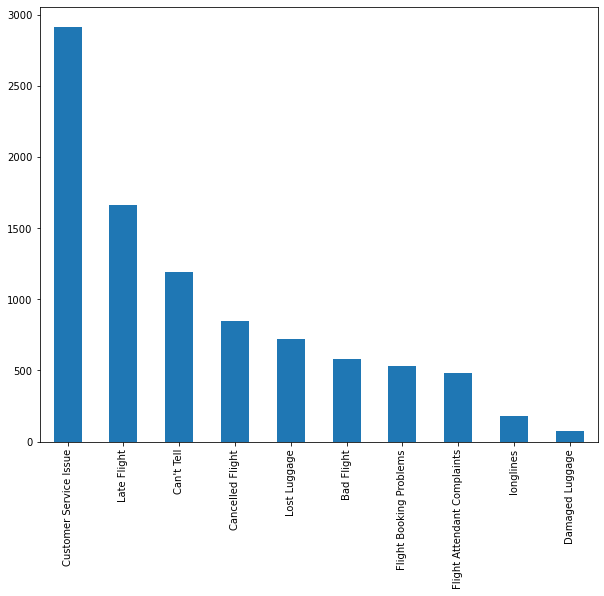

In [12]:
airlines_dataset.negativereason.value_counts().plot(kind="bar", figsize=(10,8))

### Negative Reasons for each Airline
As the grouped bar chart suggests:

* All the airlines (American, Southwest, US Airways, United, Virgin America) except Delta have a problem in Customer Services.
* Delta has a problem in Late Flights

Airlines can focus on these issues to improve their services.

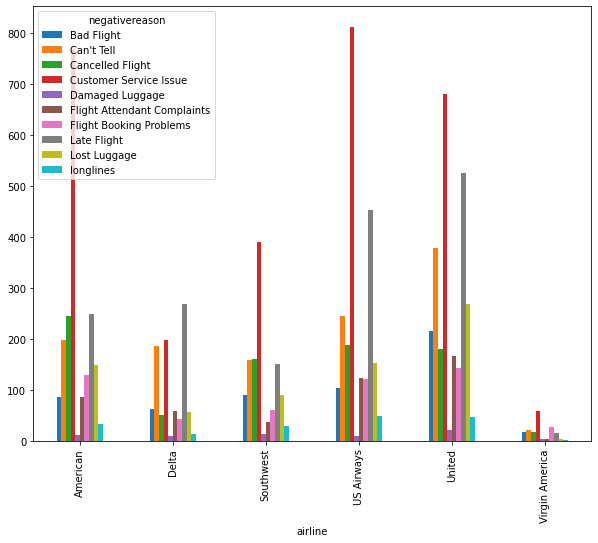

In [13]:
negative_reasons = airlines_dataset.groupby("airline")["negativereason"].value_counts()

negative_reasons.unstack(1).plot(kind="bar", figsize=(10,8))

# 3. Data Cleaning
The purpose of this step is to make the text more simple and short for the computer to process. One of the steps is to remove unwanted text from the tweets like a, an, on, out, etc...

re (regular experssion) model will be used to do this step. An amazing site to test the regular expression is [regex101](https://regex101.com/)

Data Cleaingin Steps:
1. Remove special characters like #@!$%^&?( etc...
2. Remove all single characters.
3. Remove any text with numbers.
4. Remove numerical values.
5. Remove multiple spaces.
6. Convert all the letters to lower case.

In [14]:
def dataCleaning(text):
    #Remove special characters like #@!$%^&?.
    text = re.sub("\W", " ", text)
    #Remove single characters
    text = re.sub("\s+[a-zA-Z]\s+", " ", text)
    #Remove word with numbers
    text = re.sub("\w\d\w", " ", text)
    #Remove all numbers
    text = re.sub("\d", " ", text)
    #Remove multiple spaces
    text = re.sub("\s+", " ", text)
    #Convert all text to lowercase 
    text = text.lower()
    return text

lambdaExpression = lambda x: dataCleaning(x)

In [15]:
#Save the text in new variable after cleaning
cleaned_text = pd.DataFrame(airlines_dataset.text.apply(lambdaExpression))

In [16]:
#Print the first 10 rows
cleaned_text.head(10)

,text
0,virginamerica what dhepburn said
1,virginamerica plus you ve added commercials t...
2,virginamerica didn today must mean need to ta...
3,virginamerica it really aggressive to blast o...
4,virginamerica and it a really big bad thing a...
5,virginamerica seriously would pay flight for ...
6,virginamerica yes nearly every time fly vx th...
7,virginamerica really missed prime opportunity...
8,virginamerica well didn but now do d
9,virginamerica it was amazing and arrived an h...


### Convert the airline_sentiment to Numbers
The airline_sentiment are negative, positive, and neutral. The computer can't understand it. The airline_sentiment will be mapped to:
1. negative = -1
2. neutral = 0
3. positive = 1

In [17]:
mapping = {"negative": -1, "neutral": 0, "positive": 1}

airliens_sentiments = airlines_dataset["airline_sentiment"].map(mapping)
airliens_sentiments

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

* The data right now is ready to do the modeling.

# 4. Modeling
First step is to devide the dataset into two datasets trian and test. The train model will be used to train the model and test will be used to test the model after training.

In the modeling process CountVectorizer and Tf-Idf will be used with different machine learning algorithms.

In [18]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_sentiment, test_sentiment = train_test_split(cleaned_text["text"], 
                                                    airliens_sentiments, 
                                                    random_state=0)

### CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

#Fit and transform the training data to a documnet-term matrix
train_count_vect = CountVectorizer().fit(train_text)
train_text_count_vectorized = train_count_vect.transform(train_text)
train_text_count_vectorized

<10980x11313 sparse matrix of type '<class 'numpy.int64'>'
	with 172494 stored elements in Compressed Sparse Row format>

### Tf-Idf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
train_tfidf_vect = TfidfVectorizer(min_df=5).fit(train_text)
train_text_tfidf_vectorized = train_tfidf_vect.transform(train_text)
train_text_tfidf_vectorized

<10980x2477 sparse matrix of type '<class 'numpy.float64'>'
	with 159426 stored elements in Compressed Sparse Row format>

## 4.1 Cross Validation (K-fold)

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 4.1.1 KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(10)
scoring = "accuracy"

### KNN with CountVectorizer

In [23]:
score = cross_val_score(clf_knn, train_text_count_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.43078324 0.40801457 0.39253188 0.41530055 0.39526412 0.42531876
 0.40892532 0.40710383 0.4435337  0.41074681]
mean Score = 41.38


### KNN with Tf-Idf

In [24]:
score = cross_val_score(clf_knn, train_text_tfidf_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.74590164 0.74499089 0.74681239 0.74225865 0.73770492 0.77140255
 0.75045537 0.73770492 0.75227687 0.73132969]
mean Score = 74.61


### 4.1.2 Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf_decision_tree = DecisionTreeClassifier()
scoring = "accuracy"

### Decision Tree with CountVectorizer

In [26]:
score = cross_val_score(clf_decision_tree, train_text_count_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.7003643  0.68123862 0.67850638 0.68761384 0.69125683 0.73315118
 0.7003643  0.68306011 0.69854281 0.69672131]
mean Score = 69.51


### Decision Tree with Tf-Idf

In [27]:
score = cross_val_score(clf_decision_tree, train_text_tfidf_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.66939891 0.68214936 0.6712204  0.66211293 0.66484517 0.70218579
 0.66393443 0.64936248 0.69125683 0.66484517]
mean Score = 67.21


### 4.1.3 Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(n_estimators=10)
scoring = "accuracy"

### Random Forest with CountVectorizer

In [29]:
score = cross_val_score(clf_random_forest, train_text_count_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.72313297 0.73588342 0.7431694  0.73224044 0.71766849 0.74954463
 0.74681239 0.71675774 0.75318761 0.7431694 ]
mean Score = 73.62


### Random Forest with Tf-Idf

In [30]:
score = cross_val_score(clf_random_forest, train_text_tfidf_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.71311475 0.73679417 0.72495446 0.73224044 0.7276867  0.74772313
 0.73132969 0.73679417 0.75409836 0.74954463]
mean Score = 73.54


### 4.1.4 Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

clf_SVM = SVC()
scoring = "accuracy"

### Support Vector Machine with CountVectorizer

In [32]:
score = cross_val_score(clf_SVM, train_text_count_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.77413479 0.78961749 0.79234973 0.7859745  0.76867031 0.8132969
 0.79052823 0.78961749 0.80601093 0.79690346]
mean Score = 79.07


### Support Vector Machine with Tf-Idf

In [33]:
score = cross_val_score(clf_SVM, train_text_tfidf_vectorized, train_sentiment, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(f"mean Score = {round(np.mean(score)*100, 2)}")

[0.77868852 0.80418944 0.79872495 0.79234973 0.78506375 0.81876138
 0.80874317 0.79052823 0.81056466 0.80327869]
mean Score = 79.91


# 5. Testing
The previous step helped us to determine the best machine learning algorithm to use. As a result, Support Vector Machine with Tf-Idf is the best machine learning algorithm.

In [34]:
clf_SVM_testing = SVC()
clf_SVM_testing.fit(train_text_tfidf_vectorized, train_sentiment)

SVC()

In [35]:
#prepare the test data
test_text_tfidf_vectorized = train_tfidf_vect.transform(test_text)
test_text_tfidf_vectorized

<3660x2477 sparse matrix of type '<class 'numpy.float64'>'
	with 52970 stored elements in Compressed Sparse Row format>

In [36]:
predictions = clf_SVM_testing.predict(test_text_tfidf_vectorized)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_sentiment,predictions))
print(classification_report(test_sentiment,predictions))
print(accuracy_score(test_sentiment, predictions))

[[2204   98   25]
 [ 339  400   33]
 [ 153   71  337]]
              precision    recall  f1-score   support

          -1       0.82      0.95      0.88      2327
           0       0.70      0.52      0.60       772
           1       0.85      0.60      0.71       561

    accuracy                           0.80      3660
   macro avg       0.79      0.69      0.73      3660
weighted avg       0.80      0.80      0.79      3660

0.803551912568306


# 6. References
* <b>Articles</b>
    1. https://datascienceplus.com/scikit-learn-for-text-analysis-of-amazon-fine-food-reviews/
    2. https://towardsdatascience.com/sentiment-analysis-on-us-twitter-airline-dataset-1-of-2-2417f204b971
    3. https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
* <b>GitHub Repos</b>
    1. https://github.com/adashofdata/nlp-in-python-tutorial
    2. https://github.com/mogh99/MachineLearning_Practices/tree/master/Titanic
* <b>Youtube Videos</b>
    1. series(https://youtu.be/5BVebXXb2o4)
* <b>Documntations</b>
    1. [pandas](https://pandas.pydata.org/pandas-docs/version/0.25.3/)
    2. [sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)